In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv("Fish.csv")

dataset.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
type(dataset.Species)

pandas.core.series.Series

In [6]:
X = []
y = []
i = 0

for item in dataset.Species:
    
    if item == 'Bream':
        X.append(dataset.Height[i])
        y.append(dataset.Weight[i])
        
    i = i+1

In [7]:
def plot_data(X, y, xlabel, ylabel, title):

    plt.scatter(X, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
X_scaled = preprocessing.scale(X)

I scaled the data to achieve better performance. Scaled data has zero mean, and unit variance. 

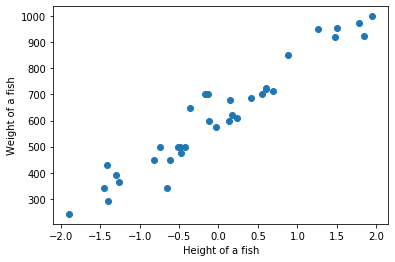

In [9]:
plot_data(X_scaled, y, "Height of a fish", "Weight of a fish", None)

In [23]:
def loss_function(y, y_predicted, n):
    
    #MAE (Mean Absolute Error)
    result = 0
    for i in range(n):
        result = result + (y[i] - y_predicted[i])**2
    
    print(result / n)
    return result/n

In [26]:
def try_many(X_scaled, y):
    
    results = []
    slope = 200
    
    for intercept in range(1000):
        y_predicted = []

        for item in X_scaled:
            y_predicted.append(intercept + slope * item)
            
        results.append(loss_function(y, y_predicted, len(y)))
    
    return results   

103979.08717733144


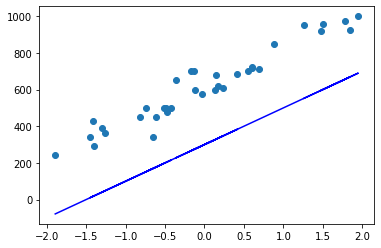

In [24]:
#Random initialization
intercept = 300
slope = 200

y_predicted = []

for item in X_scaled:
    y_predicted.append(intercept + slope * item)

plt.figure()
plt.scatter(X_scaled, y)
plt.plot(X_scaled, y_predicted, "b")

LSE = loss_function(y, y_predicted, len(y))

In [27]:
experiment = try_many(X_scaled, y)

384676.23003447446
383441.57289161725
382208.9157487601
380978.258605903
379749.60146304575
378522.9443201886
377298.2871773315
376075.6300344744
374854.97289161733
373636.31574876
372419.6586059029
371205.0014630459
369992.34432018874
368781.6871773314
367573.0300344743
366366.3728916173
365161.71574876015
363959.058605903
362758.40146304574
361559.74432018865
360363.08717733156
359168.4300344744
357975.77289161726
356785.1157487601
355596.458605903
354409.80146304576
353225.1443201886
352042.4871773315
350861.8300344744
349683.17289161717
348506.51574876
347331.85860590293
346159.2014630459
344988.54432018875
343819.88717733155
342653.23003447434
341488.57289161725
340325.91574876005
339165.25860590296
338006.60146304575
336849.94432018854
335695.28717733145
334542.63003447436
333391.9728916173
332243.3157487601
331096.6586059029
329952.00146304583
328809.3443201887
327668.68717733154
326530.03003447445
325393.37289161724
324258.7157487601
323126.0586059028
321995.40146304574
320866.

20966.05860590264
21235.401463045488
21506.744320188354
21780.0871773312
22055.430034474062
22332.772891616918
22612.115748759777
22893.458605902626
23176.801463045485
23462.14432018835
23749.4871773312
24038.830034474056
24330.17289161692
24623.51574875976
24918.858605902624
25216.20146304548
25515.54432018834
25816.8871773312
26120.23003447405
26425.572891616903
26732.91574875977
27042.25860590262
27353.601463045477
27666.944320188333
27982.287177331185
28299.630034474056
28618.9728916169
28940.31574875976
29263.658605902627
29589.001463045468
29916.344320188324
30245.687177331187
30577.03003447405
30910.372891616895
31245.715748759758
31583.05860590261
31922.401463045473
32263.74432018832
32607.08717733119
32952.430034474055
33299.77289161691
33649.115748759745
34000.45860590262
34353.80146304547
34709.14432018832
35066.48717733118
35425.830034474035
35787.17289161691
36150.515748759746
36515.858605902606
36883.20146304547
37252.544320188324
37623.88717733118
37997.23003447403
38372

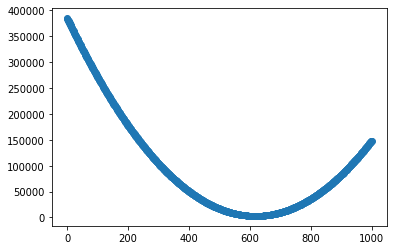

In [28]:
plt.scatter(range(1000), experiment)